##Trends Observed from the Clinical Data Analysis of various drugs done on mice.

* Amongst the four Drugs compared, Capomulin is the only one that reduced the tumor volume, hence having a possitive effect while the other had similar to no effects. Ketapril could even be seen to increase the tumor growth when compared to placebo.
* When compared with the Placebo, the three other drugs had possitive effects for metalistic spread. Meaning they all reduced spread compared to Placebo. The least spread was for Capomulin
* Survival rates for mice was best for Capomulin with about 22 surviving mice after the 45 day treatment. Meanwhile only 10-12 mice survided until the end for the other three drugs. 
* One thing to also point out is any error dealing with inputting data for mice. For example, mouse g989 has 26 entries for different drugs and repeating timepoints. Meaning there are few datapoints that can cause an error in analysis, though this error may be minor and hence negligible. 

In [1]:
# Import the necessary modules
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
clinicalDATA = pd.read_csv("raw_data/clinicaltrial_data.csv")
mouseDATA = pd.read_csv("raw_data/mouse_drug_data.csv")

print(f"Clinical data count = {len(clinicalDATA)}")
print(f"Mouse data count = {len(mouseDATA)}\n")

# Merge the two datasets on "Mouce ID" so that all data is in one table

merged_df = pd.merge(clinicalDATA, mouseDATA, how='left', on='Mouse ID')
print(merged_df.count())
print("")
print(merged_df["Mouse ID"].value_counts().head())

merged_df.head()

# Note, there are some mice that have only one or few timepoints, hence not complete data and should be filtered
# complete data are those that have a full ending timepoint of 45

        # complete_ID = merged_df.loc[merged_df["Timepoint"]==merged_df["Timepoint"].max(),"Mouse ID"]
        # complete_DF = merged_df.loc[merged_df["Mouse ID"].isin(complete_ID)]
        # complete_DF.head()

Clinical data count = 1893
Mouse data count = 250

Mouse ID              1906
Timepoint             1906
Tumor Volume (mm3)    1906
Metastatic Sites      1906
Drug                  1906
dtype: int64

g989    26
p438    10
u327    10
j365    10
q597    10
Name: Mouse ID, dtype: int64


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [3]:
DrugGroup = merged_df.groupby(["Drug","Timepoint"])
DrugGroup = pd.DataFrame(DrugGroup["Tumor Volume (mm3)"].mean())
DrugGroup.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [4]:
TumorSEM = merged_df.groupby(['Drug',"Timepoint"])['Tumor Volume (mm3)'].sem()
TumorSEM = pd.DataFrame(TumorSEM)
# Delta = Delta.fillna(0)

TumorSEM.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Pivot1 = pd.pivot_table(complete_DF, values='Tumor Volume (mm3)', index="Timepoint",columns=['Drug'], aggfunc=np.mean)
# print(Pivot1)

Pivot = DrugGroup.pivot_table(values='Tumor Volume (mm3)', index="Timepoint",columns='Drug')
Pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


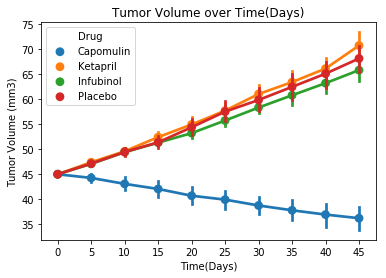

In [26]:
# CondencedPivot = Pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
# CondencedPivot = CondencedPivot.reset_index().melt("Timepoint", var_name='Drug',  value_name='Tumor Volume (mm3)')

# sns.pointplot( x="Timepoint", y = "Tumor Volume (mm3)", data=CondencedPivot, hue = "Drug")


CondencedData = merged_df.loc[merged_df["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"])]

sns.pointplot( x="Timepoint", y = "Tumor Volume (mm3)", data=CondencedData, hue = "Drug").set_title("Tumor Volume over Time(Days)")
plt.xlabel("Time(Days)")
plt.show()

In [7]:
MetaGroup = merged_df.groupby(["Drug","Timepoint"])
MetaGroup = pd.DataFrame(MetaGroup["Metastatic Sites"].mean())
MetaGroup.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
MetaSEM = merged_df.groupby(['Drug',"Timepoint"])['Metastatic Sites'].sem()
MetaSEM = pd.DataFrame(MetaSEM)

MetaSEM.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
MetaPivot = MetaGroup.pivot_table(values='Metastatic Sites', index="Timepoint",columns='Drug')
MetaPivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


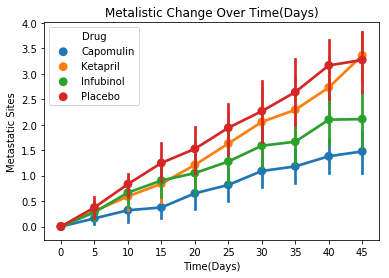

In [27]:
# CondencedMetaPivot = MetaPivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
# CondencedMetaPivot = CondencedMetaPivot.reset_index().melt("Timepoint", var_name='Drug',value_name='Metastatic Sites')

# sns.pointplot( x="Timepoint", y = "Metastatic Sites", data=CondencedMetaPivot, hue = "Drug")

sns.pointplot( x="Timepoint", y = "Metastatic Sites", data=CondencedData, hue = "Drug").set_title("Metalistic Change Over Time(Days)")
plt.xlabel("Time(Days)")
plt.show()

In [11]:
MouseGroup = merged_df.groupby(["Drug","Timepoint"])
MouseGroup = pd.DataFrame(MouseGroup["Mouse ID"].count())
MouseGroup.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [12]:
MousePivot = MouseGroup.pivot_table(values='Mouse ID', index="Timepoint",columns='Drug')
MousePivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


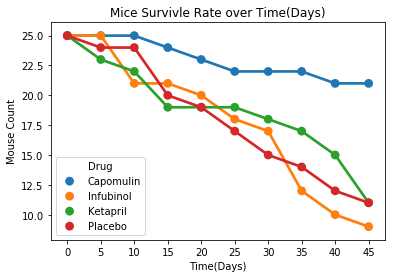

In [56]:
CondencedMouse = MousePivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
CondencedMouse = CondencedMouse.reset_index().melt("Timepoint", var_name='Drug',value_name='Mouse Count')

sns.pointplot( x="Timepoint", y = "Mouse Count", data=CondencedMouse, hue = "Drug").set_title("Mice Survivle Rate over Time(Days)")
plt.xlabel("Time(Days)")
plt.show()

In [14]:
PercentChange = (Pivot.loc[Pivot.index.max()]-Pivot.loc[Pivot.index.min()])/Pivot.loc[Pivot.index.min()]
PercentTumor = PercentChange.map('{:.2%}'.format)
PercentTumor

Drug
Capomulin    -19.48%
Ceftamin      42.52%
Infubinol     46.12%
Ketapril      57.03%
Naftisol      53.92%
Placebo       51.30%
Propriva      47.24%
Ramicane     -22.32%
Stelasyn      52.09%
Zoniferol     46.58%
dtype: object

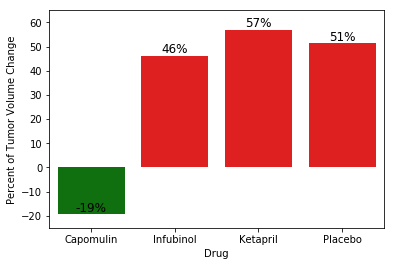

In [55]:
Test = PercentChange.loc[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

colors = ['red' if y >=0 else 'green' for y in Test]

ax = sns.barplot(x=Test.index, y=Test*100, palette=colors)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), str(int(p.get_height()))+"%", 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.ylabel("Percent of Tumor Volume Change")
plt.ylim(-25,65) 
plt.show()